# Task: Main cause of accidents

The goal of this notebook is to explore the leading causes of accidents. This notebook features N-grams and excerpts from accident descriptions, the examples displayed won't be graphic.

Thanks to:
* IHM Stefanini for the data set https://www.kaggle.com/ihmstefanini/industrial-safety-and-health-analytics-database
* Tinotenda Mhlanga for the task https://www.kaggle.com/tinotendamhlanga
* Robert L. Lorber and Gregory M. Anderson, https://safety247.org/ , authors of the book safety 24/7 which inspired more than a few of the points brought up in this notebook 

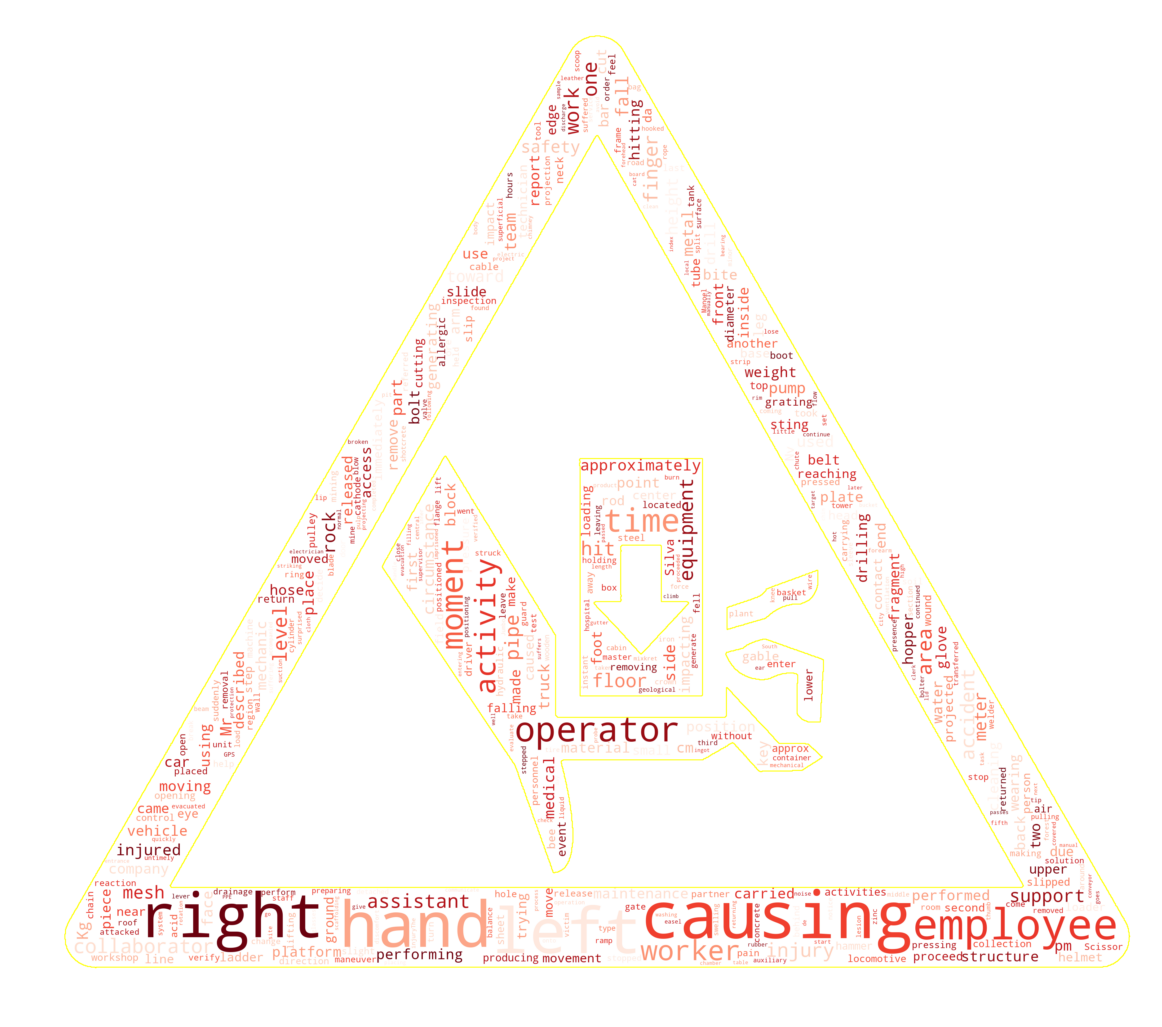

### TLDR

The conclusion reached by this notebook is that the largest cause of incidents in this data set is Non-Safety Conscious Hand Operations. While we chose this as the leading cause of incidents, there were many other factors. See below for the full exploratory data analysis and the other conclusions we reached.

In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/caution-hands/Hand_crush_grey.jpg
/kaggle/input/caution-hands/Hand_crush_grey_3.png
/kaggle/input/caution-hands/Hand_crush_grey_2.png
/kaggle/input/industrial-safety-and-health-analytics-database/Accidents_Storyline_example.png
/kaggle/input/industrial-safety-and-health-analytics-database/IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv
/kaggle/input/industrial-safety-and-health-analytics-database/IHMStefanini_industrial_safety_and_health_database.csv


In [2]:
data = pd.read_csv('/kaggle/input/industrial-safety-and-health-analytics-database/IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv')
data = data.drop(['Unnamed: 0'], axis=1)## This was the original index column, there are a few missing entries which cause some issues when attempting to call a row by index, so I chose to reindex
data.tail()

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
420,2017-07-04 00:00:00,Country_01,Local_04,Mining,I,III,Male,Third Party,Others,"Being approximately 5:00 a.m. approximately, w..."
421,2017-07-04 00:00:00,Country_01,Local_03,Mining,I,II,Female,Employee,Others,The collaborator moved from the infrastructure...
422,2017-07-05 00:00:00,Country_02,Local_09,Metals,I,II,Male,Employee,Venomous Animals,During the environmental monitoring activity i...
423,2017-07-06 00:00:00,Country_02,Local_05,Metals,I,II,Male,Employee,Cut,The Employee performed the activity of strippi...
424,2017-07-09 00:00:00,Country_01,Local_04,Mining,I,II,Female,Third Party,Fall prevention (same level),"At 10:00 a.m., when the assistant cleaned the ..."


# Features

The section below is a description of the dataset which I copied directly from the Kaggle page. The data was collected from 12 different plants in 3 different countries.

    Columns description
        Data: timestamp or time/date information
        Countries: which country the accident occurred (anonymized)
        Local: the city where the manufacturing plant is located (anonymized)
        Industry sector: which sector the plant belongs to
        Accident level: from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)
        Potential Accident Level: Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors involved in the accident)
        Genre: if the person is male of female
        Employee or Third Party: if the injured person is an employee or a third party
        Critical Risk: some description of the risk involved in the accident
        Description: Detailed description of how the accident happened.

It is worth noting that components of this dataset were anonymized to hide the location and name of each facility.

In [3]:
crit_risk = data['Critical Risk'].value_counts()
crit_risk

Others                                       232
Pressed                                       24
Manual Tools                                  20
Chemical substances                           17
Venomous Animals                              16
Cut                                           14
Projection                                    13
Bees                                          10
Fall                                           9
Vehicles and Mobile Equipment                  8
Fall prevention (same level)                   7
Pressurized Systems                            7
remains of choco                               7
Fall prevention                                6
Suspended Loads                                6
Liquid Metal                                   3
Blocking and isolation of energies             3
Power lock                                     3
Pressurized Systems / Chemical Substances      3
Electrical Shock                               2
Projection of fragme

# Notes on Critical Risk:

More than half the incidents fall under the category 'Others'. A possible explanation might be that the entries for this database were entered through a form or program that had a limited number of valid inputs, so 'Others' was the most valid bin for the incident. It could also be that these entries were changed to 'Others' as part of the anonymization process. Or it also could be that the details were lost in translation. 

In [4]:
## Changing the string representation of incident level to its integer value for easier plotting and comparison 
level_map = {'I': 1, 'II': 2,'III': 3 , 'IV' : 4, 'V': 5, 'VI' : 6}
data['Accident Level'] = pd.Series([level_map[x] for x in data['Accident Level']], index=data.index)
data['Potential Accident Level'] = pd.Series([level_map[x] for x in data['Potential Accident Level']], index=data.index)
data['Risk_differnce'] = data['Potential Accident Level'] - data['Accident Level']

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

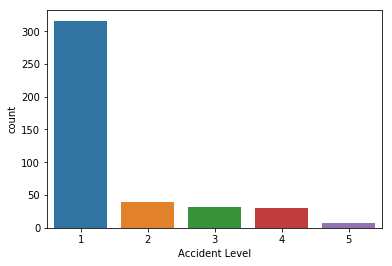

In [6]:
sns.countplot(data['Accident Level'])

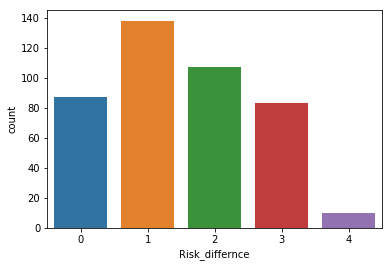

In [7]:
sns.countplot(data['Risk_differnce'])

In [8]:
acc_level = data['Accident Level'].value_counts()
acc_level

1    316
2     40
3     31
4     30
5      8
Name: Accident Level, dtype: int64

In [9]:
risk_delta = data['Risk_differnce'].value_counts()
risk_delta

1    138
2    107
0     87
3     83
4     10
Name: Risk_differnce, dtype: int64

In [10]:
potential_acc_level = data['Potential Accident Level'].value_counts()
potential_acc_level

4    143
3    106
2     95
1     49
5     31
6      1
Name: Potential Accident Level, dtype: int64

In [11]:
# This shows us the average value for accident level
# Notice that Accident level and Risk difference share their mean, standard deviation, 25%, 50%, and 75% values
data.describe()

,Accident Level,Potential Accident Level,Risk_differnce
count,425.000000,425.000000,425.000000
mean,1.527059,3.035294,1.508235
std,1.023243,1.155861,1.092665
min,1.000000,1.000000,0.000000
25%,1.000000,2.000000,1.000000
50%,1.000000,3.000000,1.000000
75%,2.000000,4.000000,2.000000
max,5.000000,6.000000,4.000000


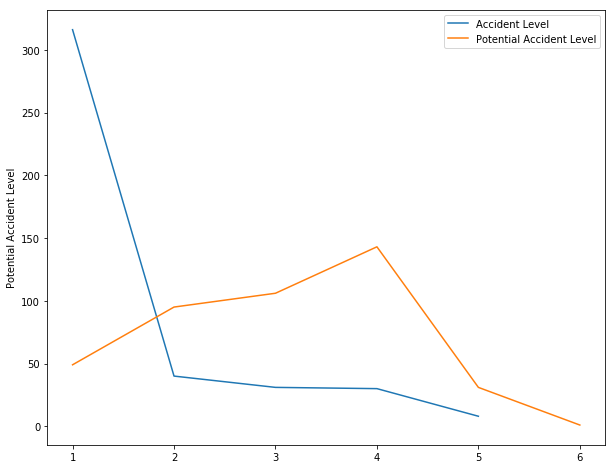

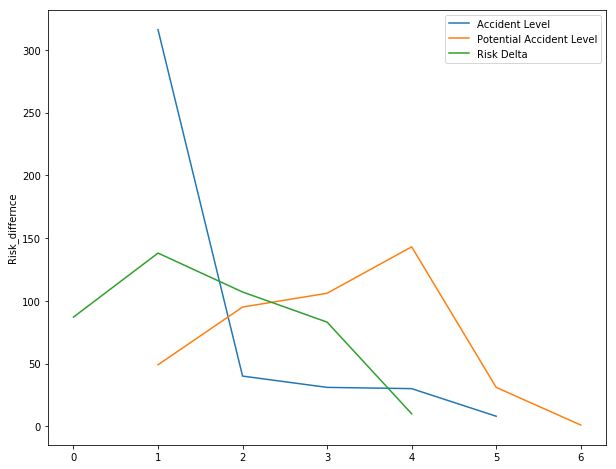

In [12]:
## The first plot below shows the distribution of incidents
## The blue line represents the Severity of the accident
## the yellow line represents the potential severity
## The second plot we added a line to indicate the difference in risk 


plt.figure(figsize=(10,8))
sns.lineplot(y=acc_level, x=acc_level.index)
sns.lineplot(y=potential_acc_level, x=potential_acc_level.index)
plt.legend(labels=['Accident Level', 'Potential Accident Level'])


plt.figure(figsize=(10,8))
sns.lineplot(y=acc_level, x=acc_level.index)
sns.lineplot(y=potential_acc_level, x=potential_acc_level.index)
sns.lineplot(y=risk_delta, x=risk_delta.index)
plt.legend(labels=['Accident Level', 'Potential Accident Level', 'Risk Delta'])

Notice in the graph above there is a significant difference between the severity of an incident, and the potential severity of the incident. This ties very neatly into a concept from safety 24/7.


# The Safety Pyramid
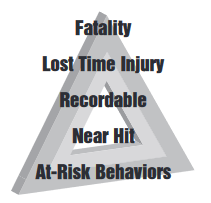

The concept is fairly simple. At the bottom of the pyramid you have at-risk behaviors, and as these unsafe behaviors continue the outcome starts to work up the pyramid.<br />An example of such a behavior might be speeding, most of the time when someone is driving too fast nothing happens, so they continue to drive too fast. This causes bullet-proof thinking: "Nothing bad has happened when I did this before, nothing will happen this time". Given enough time and a near miss will occur, a close call that maybe won't have happened if they were driving more reasonably. Eventually this moves a bit higher up on the pyramid and someone gets hurt.

The fact that this data was collected and published for the world to view and provide critical feedback on suggests that this organization probably has a strong safety culture (at least at the corperate level), one that doesn't tolerate bullet-proof thinking.

# Population dependant features:

The catagories Countries, Local, Industry Sector, Genre(Gender), and Employee or Third Party can provide some insight into incedent risk. Without seeing the ratio of population size to incedent occurances it can lead to some false conclusions. 

Incedents by possible factor: Countries


Country_01    251
Country_02    130
Country_03     44
Name: Countries, dtype: int64

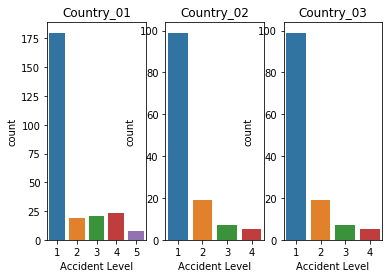

In [13]:
print('Incedents by possible factor: Countries')
display(data['Countries'].value_counts())


fig, ax =plt.subplots(1,3)
ax[0].set_title('Country_01')
sns.countplot(data['Accident Level'].loc[data['Countries'] == 'Country_01'], ax=ax[0])
ax[1].set_title('Country_02')
sns.countplot(data['Accident Level'].loc[data['Countries'] == 'Country_02'], ax=ax[1])
ax[2].set_title('Country_03')
sns.countplot(data['Accident Level'].loc[data['Countries'] == 'Country_02'], ax=ax[2])

### Observations: country

Notice above that country 1 has more incidents than the other two countries combined. By itself, this isn't necessarily significant. For instance Country 1 could have twice as many workers as either of the other two groups. However, in country 1 the rate of level 4 incidents are much higher (23 incidents in 251, where there are only 7 in the other 174). To get a good birds eye view of the ratios of incident severities we are using Seaborn’s countplot function, keep in mind that each plot isn't using the same measurement for each tick mark. 

In [14]:
print('Incedents by possible factor: Local')
display(data['Local'].value_counts())

display(data.loc[data['Local'] == 'Local_09'])
data.loc[data['Local'] == 'Local_11']

print(data.Description.iloc[119])
print('###')
print(data.Description.iloc[212])

Incedents by possible factor: Local


Local_03    90
Local_05    59
Local_01    57
Local_04    56
Local_06    46
Local_10    44
Local_08    27
Local_02    24
Local_07    14
Local_12     4
Local_09     2
Local_11     2
Name: Local, dtype: int64

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description,Risk_differnce
82,2016-04-04 00:00:00,Country_02,Local_09,Metals,3,4,Male,Employee,Manual Tools,When it opens the suction valve of the 420-BO-...,1
422,2017-07-05 00:00:00,Country_02,Local_09,Metals,1,2,Male,Employee,Venomous Animals,During the environmental monitoring activity i...,1


When an employee of MILPO Lima visited the facilities, when he was at level 2900, waiting for the personnel cage to go up to level 4070, drops of water fall from the ceiling from a height of 2.20 meters approximately, product of a slight filtration in the crown (sustained with shotcrete), a drop enters the right eye causing discomfort in the right eye. According to the employee, at the time of the accident the lenses had been removed to clean them, this happened after the visit to the interior of the mine.
###
In the city of Conchucos, of Ancash, participating in a patronal feast, representing the company, was mounted on a horse as part of the ceremony throwing fruits and toys to the people attending this public event, the noise of the materials pyrotechnics and people trying to collect the gifts caused the horse in front and very close to her horse to be frightened and kicked back hitting the lower limbs.


 ### Local 11
 
Sometimes it helps to take a closer look at an outlier, such as Local 11. Notice how there are only 2 entries, one occurred off property and the other was from an employee visiting from another location. This could mean that this location doesn't follow proper reporting procedures, or it could be that they have a very safe workspace, or possibly they only have a staff of one or two people for day to day operations. 

Incedents by possible factor: Industry Sector


Mining    241
Metals    134
Others     50
Name: Industry Sector, dtype: int64

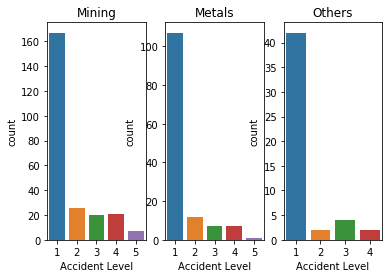

In [15]:
print('Incedents by possible factor: Industry Sector')
display(data['Industry Sector'].value_counts())


fig, ax =plt.subplots(1,3)
ax[0].set_title('Mining')
sns.countplot(data['Accident Level'].loc[data['Industry Sector'] == 'Mining'], ax=ax[0])
ax[1].set_title('Metals')
sns.countplot(data['Accident Level'].loc[data['Industry Sector'] == 'Metals'], ax=ax[1])
ax[2].set_title('Others')
sns.countplot(data['Accident Level'].loc[data['Industry Sector'] == 'Others'], ax=ax[2])

Incedents by possible factor: Genre


Male      403
Female     22
Name: Genre, dtype: int64

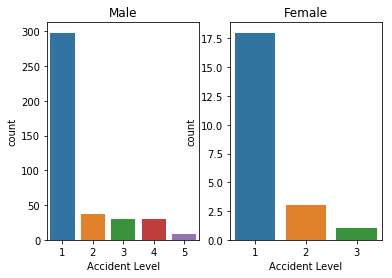

In [16]:
print('Incedents by possible factor: Genre')
display(data['Genre'].value_counts())

fig, ax =plt.subplots(1,2)
ax[0].set_title('Male')
sns.countplot(data['Accident Level'].loc[data['Genre'] == 'Male'], ax=ax[0])
ax[1].set_title('Female')
sns.countplot(data['Accident Level'].loc[data['Genre'] == 'Female'], ax=ax[1])

Incedents by possible factor: Employee or Third Party


Third Party             189
Employee                179
Third Party (Remote)     57
Name: Employee or Third Party, dtype: int64

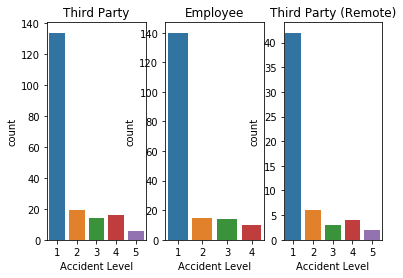

In [17]:
print('Incedents by possible factor: Employee or Third Party')
display(data['Employee or Third Party'].value_counts())

fig, ax =plt.subplots(1,3)
ax[0].set_title('Third Party')
sns.countplot(data['Accident Level'].loc[data['Employee or Third Party'] == 'Third Party'], ax=ax[0])
ax[1].set_title('Employee')
sns.countplot(data['Accident Level'].loc[data['Employee or Third Party'] == 'Employee'], ax=ax[1])
ax[2].set_title('Third Party (Remote)')
sns.countplot(data['Accident Level'].loc[data['Employee or Third Party'] == 'Third Party (Remote)'], ax=ax[2])

# N-Grams

N-grams are a tool in nlp for finding sets of commonly co-occuring words, where *n* refers to the number of consecutive occuring words. for instance *'near', 'drainage', 'pump'* would be a 3 word n-gram or trigram. 

In [18]:
import nltk
from nltk.util import ngrams
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
import re

In [19]:
# This creates one long string to perform n-gram operations on
super_string = data['Description'].sum()
super_string = re.sub(r'[^\w\s]','',super_string)
super_string = super_string.split(' ')
stop_words = set(nltk.corpus.stopwords.words('english'))
super_string = [word for word in super_string if word not in stop_words]
len(super_string)

15196

In [20]:
# Notice how frequently hands are mentioned
word_fd = nltk.FreqDist(super_string)
bigram_fd = nltk.FreqDist(nltk.bigrams(super_string))

bigram_fd.most_common(10)

[(('left', 'hand'), 58),
 (('time', 'accident'), 55),
 (('At', 'time'), 52),
 (('right', 'hand'), 48),
 (('causing', 'injury'), 34),
 (('At', 'moment'), 25),
 (('finger', 'left'), 21),
 (('da', 'Silva'), 18),
 (('medical', 'center'), 15),
 (('The', 'employee'), 15)]

In [21]:
bigram_fd = nltk.FreqDist(nltk.trigrams(super_string))

bigram_fd.most_common(10)

[(('At', 'time', 'accident'), 42),
 (('finger', 'left', 'hand'), 17),
 (('injury', 'At', 'time'), 14),
 (('finger', 'right', 'hand'), 10),
 (('time', 'accident', 'employee'), 8),
 (('Manoel', 'da', 'Silva'), 8),
 (('described', 'At', 'time'), 7),
 (('left', 'hand', 'causing'), 6),
 (('causing', 'injury', 'The'), 6),
 (('At', 'time', 'event'), 6)]

In [22]:
bigram_fd = nltk.FreqDist(nltk.ngrams(super_string,7))

bigram_fd.most_common(9)

[(('evaluate', 'geological', 'points', 'following', 'GPS', 'near', 'drainage'),
  3),
 (('geological',
   'points',
   'following',
   'GPS',
   'near',
   'drainage',
   'Following'),
  3),
 (('points', 'following', 'GPS', 'near', 'drainage', 'Following', 'state'), 3),
 (('following', 'GPS', 'near', 'drainage', 'Following', 'state', 'highway'),
  3),
 (('GPS', 'near', 'drainage', 'Following', 'state', 'highway', 'gives'), 3),
 (('near', 'drainage', 'Following', 'state', 'highway', 'gives', 'access'), 3),
 (('drainage', 'Following', 'state', 'highway', 'gives', 'access', 'Aripuanã'),
  3),
 (('Following', 'state', 'highway', 'gives', 'access', 'Aripuanã', 'area'), 3),
 (('state', 'highway', 'gives', 'access', 'Aripuanã', 'area', 'stopped'), 3)]

In [23]:
# single word counts, note how frequent the word 'hand' occurs.
bigram_fd = nltk.FreqDist(nltk.ngrams(super_string,1))

bigram_fd.most_common(9)

[(('causing',), 166),
 (('left',), 157),
 (('right',), 154),
 (('',), 150),
 (('hand',), 145),
 (('employee',), 123),
 (('operator',), 117),
 (('The',), 112),
 (('time',), 101)]

In [24]:
# Attempt with skip-grams, did not find anything signifigant

bigram_fd = nltk.FreqDist(nltk.skipgrams(super_string, n=4, k=3))

bigram_fd.most_common(9)


[(('injury', 'At', 'time', 'accident'), 18),
 (('At', 'time', 'accident', 'safety'), 14),
 (('causing', 'At', 'time', 'accident'), 14),
 (('At', 'time', 'accident', 'used'), 13),
 (('described', 'At', 'time', 'accident'), 12),
 (('hand', 'At', 'time', 'accident'), 11),
 (('causing', 'injury', 'time', 'accident'), 10),
 (('At', 'time', 'accident', 'employee'), 10),
 (('time', 'accident', 'wearing', 'safety'), 9)]

In [25]:
crit_acc = data.loc[data['Accident Level'] >= 4]
crit_acc.shape

(38, 11)

In [26]:
super_hr_string = crit_acc['Description'].sum()
super_hr_string = re.sub(r'[^\w\s]','',super_hr_string)
super_hr_string = super_hr_string.split(' ')
super_hr_string = [word for word in super_hr_string if word not in stop_words]
len(super_hr_string)

1703

In [27]:
bigram_fd = nltk.FreqDist(nltk.ngrams(super_hr_string,1))

bigram_fd.most_common(10)

[(('',), 23),
 (('operator',), 22),
 (('left',), 19),
 (('causing',), 16),
 (('right',), 14),
 (('At',), 13),
 (('moment',), 13),
 (('hand',), 13),
 (('Mr',), 12),
 (('truck',), 11)]

In [28]:
bigram_fd = nltk.FreqDist(nltk.ngrams(super_hr_string,2))

bigram_fd.most_common(10)

[(('left', 'hand'), 9),
 (('causing', 'injury'), 6),
 (('At', 'moment'), 6),
 (('At', 'time'), 6),
 (('time', 'accident'), 6),
 (('right', 'hand'), 3),
 (('medical', 'center'), 3),
 (('steel', 'plate'), 3),
 (('pulley', 'motor'), 2),
 (('cm', ''), 2)]

# Notes from n-grams

A frequent occurrence in the n-grams are references to hands. In fact, hand is the fourth most common word in the dataset behind left, right, and causing.

To get a better feel for the data I read through about a quarter of the entries in the dataset. Hand injuries are one of the most common stories in the data set. Three themes emerge when reading through the incident descriptions.

In [29]:
print(data.Description.iloc[393])

ACTIVITY: maintenance on scaller 07 - breaker arm extension cylinder LOCAL: underground mine (level 316) During the removal of the cylinder from the scaller arm, when releasing the fixing pin the cylinder "came down" and bumped into the tool used to press his hand between the tool and the structure of the equipment.


### Theme 1: Hands near moving parts

Not being mindful of where one's hands are in relation to moving parts 

In [30]:
print(data.Description.iloc[407])

The employee performed insertion and adjustment of the joint in the blind flange of a 54 "tubing, when one of the wedges shifted, causing movement in the flange, causing the 3rd and 4th fingers of the left hand to be pressed.


### Theme 2: Using hands to secure something that should be secured with a more appropriate tool

There were many instances where hands were caught in moving parts that should have had a more appropriate tool to secure them.

In [31]:
print(data.Description.iloc[383])

The employee used a lever to remove the sealing ring from the front tire of the wheel loader (LHD 05) when the lever came to release from the fulcrum in the ring and press the left ring finger against the loader shell causing traumatism at the tip of the said finger.


 ### Theme 3: Excess force

Applying excess force to dislodge something or move a part that is stiff

In [32]:
## Now to generate the graphic that we started with

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

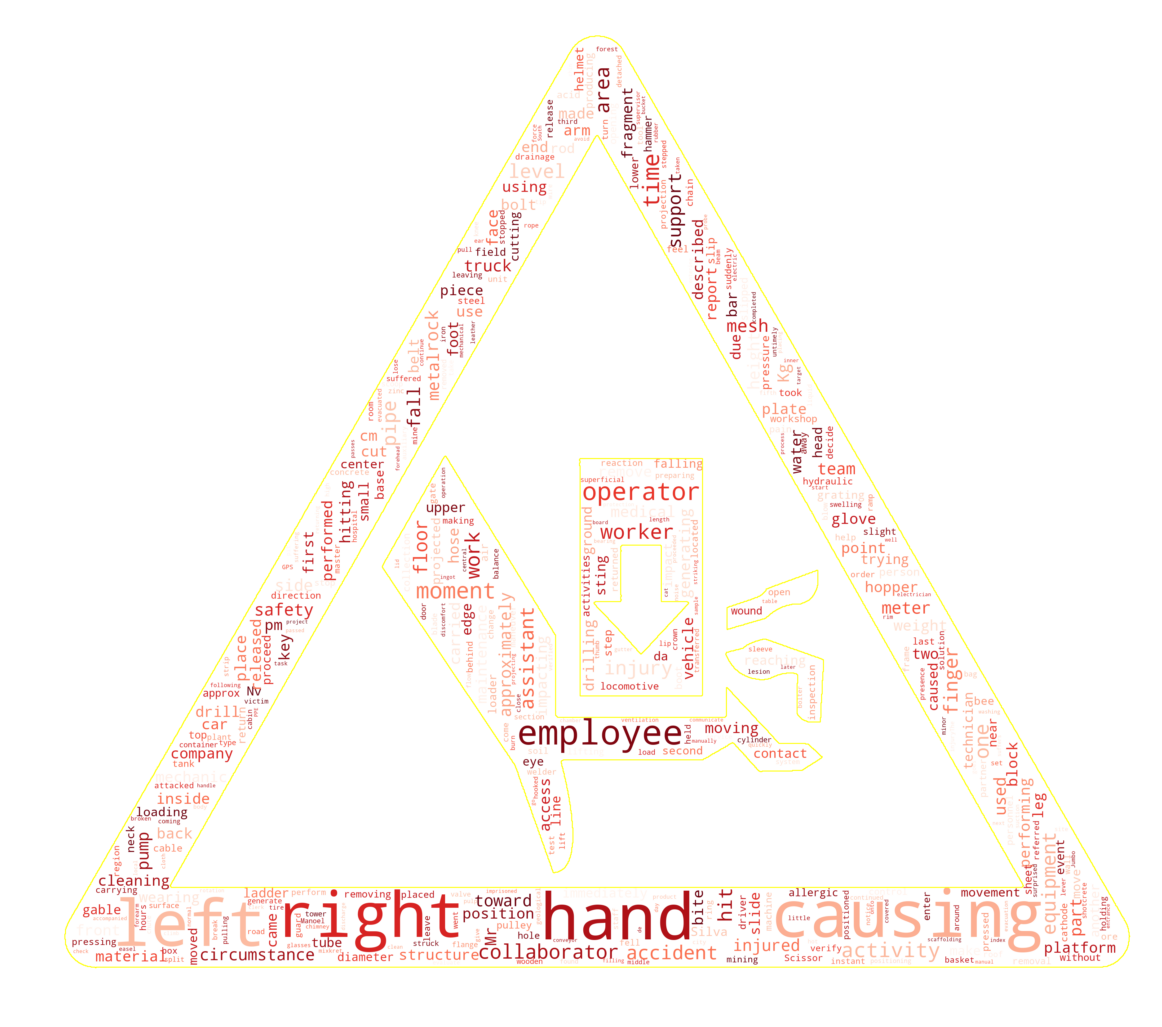

In [33]:
text = " ".join(super_string)
mask = np.array(Image.open("/kaggle/input/caution-hands/Hand_crush_grey_3.png"))
wordcloud_hands = WordCloud(width=1200,height=1200, prefer_horizontal=0.5,scale=2,colormap='Reds',
                            collocations=False, background_color='white', mode="RGB", min_font_size=8,
                            max_words=2500, mask=mask, contour_width=3,  contour_color='yellow').generate(text)

plt.figure(figsize=[20,20])
plt.imshow(wordcloud_hands,interpolation="bilinear")
plt.axis("off")
plt.show()

# Final Thoughts:
<br />Through a combination of basic NLP and rooting around in the data a reasonable case that Non-Safety Conscious Hand Operations are the main cause of incidents. By being mindful of moving parts, using the appropriate tool for the job, and reframing from using excess force you can reduce the amount of incidents that occur. To paraphrase from safety 24/7 "Before performing a task that has risk, take a moment to consider the risk and what you can do to stay safe" (couldn't find the exact quote online and I no longer have the book).
### All accidents and injuries are preventable.

When exploring the data, particularly n-grams, many alternate causes popped up that warrant further exploration, and could even contain a greater cause of incidents than what we found. Given that this notebook is part of an ongoing project I've titled "task of the week '' there may be more to find in the dataset outside what we uncovered. Feel free to fork this notebook and dive into the data yourself.

This year I've challenged myself to complete one task on Kaggle per week, in order to develop a larger Data Science portfolio. If you found this notebook useful or interesting please give it an upvote. I'm always open to constructive feedback. If you have any questions, comments, concerns, or if you would like to collaborate on a future task of the week feel free to leave a comment here or message me directly. For past TOTW check out the link to my page on github for this ongoing project<br />
https://github.com/Neil-Kloper/Weekly-Kaggle-Task/wiki